# What is a Logistic Regression?

## Titanic Data Set

The data that we will use to it the Titanic data set. From Kaggle

We will use Logistic Regression to predict/classify people died in the sinking of the RMS titianic 

# Unpacking the Data 

In [1]:
# import modules 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
# figures inline and set visulization style 
%matplotlib inline
sns.set()

We split the data into 2 sets training and test set. We will use the training data to estimate/determine the coefficeints of our logistic Regression. 

In [2]:
trainset = pd.read_csv('train.csv')
testset  = pd.read_csv('test.csv')
# view the first five rows of your data
trainset.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Looking at the Age colum we see that some of the entries are not filled in or are filled with an NaN. In order for our model to make a more accurate prediction we will need to fill these in. You can fill the NaN with any information that you want but how you fill it in will effect your results. In our case I will fill in with the average age but you can easilu fillin with the median or some other statistic.

In [4]:
trainset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
trainset['Age'] = trainset.Age.fillna(value = 30, limit = 263)# fills in NaNs with the average age which is 30
trainset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Attempting a Linear Regression

First We want to see why Linear Regression doesn't work before we use Logistic if Linear Regression gives us an accurate model then we wouldn't necessarily need Logistic regression.

### Note:

For Demonstration we will hard code one-dimensional regressions and then use sklearn.

### Changing testset

This creates a new dataset for 

In [6]:
new_trainset = pd.DataFrame(trainset['Age'],trainset['Survived'])
new_trainset

,Age
Survived,
0,22.0
1,38.0
1,38.0
1,38.0
0,22.0
0,22.0
0,22.0
0,22.0
1,38.0


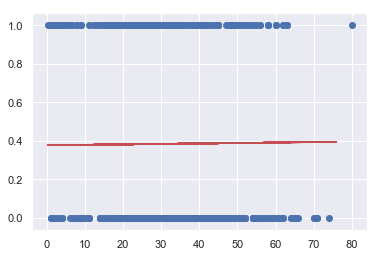

In [7]:
Survived = trainset['Survived']
Age = trainset ['Age']
testAge = testset['Age']
plt.scatter(Age,Survived)

def linear_regression(x,y):# linear regression from Scratch
    xbar = np.mean(x)
    ybar = np.mean(y)
    x2bar = np.mean(x**2)
    xybar = np.mean(x*y)
    
    A = np.array([[1,xbar],[xbar, x2bar]])
    b = np.array([ybar, xybar])
    b0,b1 = np.linalg.solve(A,b)
    
    fx = b0 + b1*x
    plt.plot(x,fx,"r")
    
linear_regression (testAge, Survived)


### $R^2$

In [8]:
def correlation(x,y):
    xbar = np.mean (x)
    ybar = np.mean (y)
    xybar = np.mean(x*y)
    sig_x = np.std(x)
    sig_y = np.std(y)
    r = (xybar- (xbar*ybar))/(sig_x*sig_y)
    return(r)

In [9]:
r = correlation(Age,Survived)
print ('The correlation Coefficiaent is {}'. format(r))
print ('The R squared score is {}'.format(r**2))

The correlation Coefficiaent is -0.07065723128500295
The R squared score is 0.0049924443328624


The $R^2$ score is very low 

In [10]:
LinearRegression().fit(new_trainset,new_trainset)
#plt.plot(y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Using Logistic Regression

A Logistic Regression is a model of the probablity that an element of data belongs to a particular classification given some partcular features or events. We can think of this Mathmatically in terms of conditional probability and can wite it as 

$$Pr(Y = 1|x) = p(x)$$
$$Pr(Y = 0|x) = 1- p(x)$$

Here we say that $Y = 1$ if the element of data belongs to the classification and $Y = 0$ if the data does $\textit{not}$ belong to the particular classification. We use a linear regression to model the log of the ratio of the two probabilites and write that mathematically as


$$odds = \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1$$



Solving for $\beta_0$ and $\beta_1$ is similar to that of a linear regression. We assume that our linear regression is an approximation of the odds


$$odds - \beta_0 + \beta_1x_1 = \epsilon$$

Part of the regression is determining which features of our data we want to include in our model. We are gonna pay attention to:

- Sex
- Age 
- Fare

One can do more data analysis to determning which features are important to the model but since this just a demonstration for logistic regression we won't focus on it here.

So we are going to want our Logsitic model to be something like this

$$\log \left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 Age$$

our probability is 

$$p(x_i) = \frac{1}{1+e^{\beta_0 + \beta_1 Age}} $$

of course we are goning to have to find a way to turn our features in to numbers. 